# Computation of the `pi table` for the observation sequence [`low speed` (`t=1`), `high speed` (`t=2`), `low speed` (`t=3`)]

In [1]:
import numpy as np
# 0 = left
# 1 = right
pi_zero = np.array([0.8, 0.2])  # deduced from the `alpha_table`
transition = np.array([[0.8, 0.4], [0.2, 0.6]])

def pi(k):
    if k == 0:
        return pi_zero
    return np.dot(transition, pi(k-1))

In [2]:
# collect values
res = np.reshape(pi(0), (1, 2))
for i in range(1, 8):
    temp = np.reshape(pi(i), (1, 2))
    res = np.concatenate((res, temp), axis=0)
print(res)

[[0.8        0.2       ]
 [0.72       0.28      ]
 [0.688      0.312     ]
 [0.6752     0.3248    ]
 [0.67008    0.32992   ]
 [0.668032   0.331968  ]
 [0.6672128  0.3327872 ]
 [0.66688512 0.33311488]]


# Plot the change in the state distribution as the prediction horizon increases

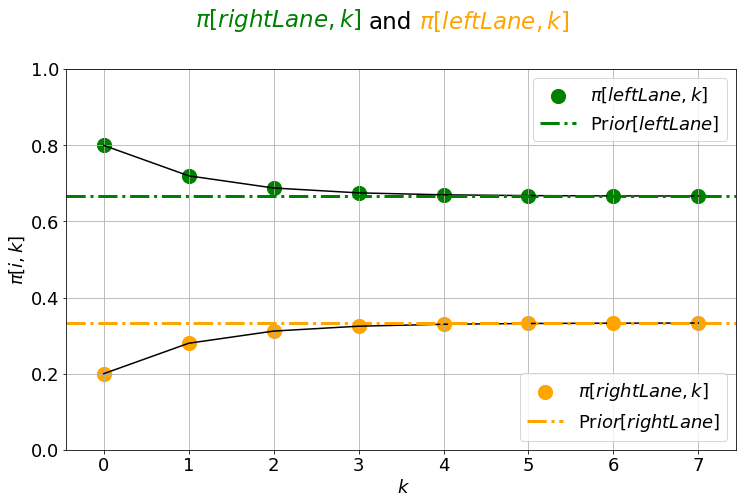

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
    
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)

plt.plot(res, c='k')

scatter_l = plt.scatter(np.arange(res[:, 0].size), res[:, 0], s=200, c='g', label=r'$\pi[leftLane, k]$')
scatter_r = plt.scatter(np.arange(res[:, 1].size), res[:, 1], s=200, c='orange', label=r'$\pi[rightLane, k]$')

init_prob_right = 2/3
init_prob_left = 1/3
prior_l = plt.axhline(y=init_prob_right, c='g', linestyle="-.", linewidth=3)
prior_r = plt.axhline(y=init_prob_left, c='orange', linestyle="-.", linewidth=3, label=r'$\pi[rightLane, k]$')

l0 = plt.legend([scatter_l, prior_l], [r'$\pi[leftLane, k]$', r'$\Prior[leftLane]$'], loc='upper right', prop={'size': 18})
l2 = plt.legend([scatter_r, prior_r], [r'$\pi[rightLane, k]$', r'$\Prior[rightLane]$'], loc='lower right', prop={'size': 18})
plt.gca().add_artist(l0)

plt.grid()
plt.ylim(0, 1)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel(r'$\ k$', fontsize=18, fontweight='bold')
plt.ylabel(r'$\pi[i, k]$', fontsize=18, fontweight='bold')
fig.text(0.37, 0.95, r'$\pi[rightLane, k]$', ha="center", va="bottom", size="medium", color="g", fontsize=23)
fig.text(0.5, 0.95, "and", ha="center", va="bottom", size="medium", fontsize=23)
fig.text(0.62,0.95,'$\pi[leftLane, k]$', ha="center", va="bottom", size="medium",color="orange", fontsize=23)

fig.savefig('docs/pi_of_k.PNG')